<a href="https://colab.research.google.com/github/parwinderau/machinelearning/blob/main/RNN_SolarSpot_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Solar spots examples
# we can load at the beginning all the needing modules

from pandas import read_csv
import numpy as np
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import math
import matplotlib.pyplot as plt

In [26]:
# Using functions make the program modular. It is then easy to structure in Jupyter
# But in case you can also export easily in Python for your projects.

# Parameter split_percent defines the ratio of training examples
def get_train_test():
  
  split_percent = 0.8
  url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'

  # converting the dataframe into array
  df = read_csv(url, usecols=[1], engine='python')
  data = np.array(df.values.astype('float32'))

  # scaling the features to have them between 0 and 1
  scaler = MinMaxScaler(feature_range=(0, 1))
  data = scaler.fit_transform(data).flatten()
  n = len(data)

  # splitting data into train and test
  split = int(n*split_percent)
  train_data = data[range(split)]
  test_data = data[split:]

  return train_data, test_data, data

In [27]:
# Data and labels

def get_XY(dat, time_steps):
  Y_ind = np.arange(time_steps, len(dat), time_steps)
  Y = dat[Y_ind]
  rows_x = len(Y)
  X = dat[range(time_steps*rows_x)]
  X = np.reshape(X, (rows_x, time_steps, 1))
  return X, Y

In [28]:
# RNN shaping

def create_RNN(hidden_units, dense_units, input_shape, activation):
  model = Sequential()
  model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
  model.add(Dense(units=dense_units, activation=activation[1]))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [29]:
# RMSE error calculation and Plot

def print_error(trainY, testY, train_predict, test_predict):
  # Error of predictions
  train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
  test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
  # Print RMSE
  print('Train RMSE: %.3f RMSE' % (train_rmse))
  print('Test RMSE: %.3f RMSE' % (test_rmse))

# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
  actual = np.append(trainY, testY)
  predictions = np.append(train_predict, test_predict)
  rows = len(actual)
  plt.figure(figsize=(15, 6), dpi=80)
  plt.plot(range(rows), actual)
  plt.plot(range(rows), predictions)
  plt.axvline(x=len(trainY), color='r')
  plt.legend(['Actual', 'Predictions'])
  plt.xlabel('Observation number after given time steps')
  plt.ylabel('Sunspots scaled')
  plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

Epoch 1/15
187/187 - 1s - loss: 0.3837 - 1s/epoch - 7ms/step
Epoch 2/15
187/187 - 0s - loss: 0.1048 - 461ms/epoch - 2ms/step
Epoch 3/15
187/187 - 0s - loss: 0.0471 - 479ms/epoch - 3ms/step
Epoch 4/15
187/187 - 0s - loss: 0.0272 - 453ms/epoch - 2ms/step
Epoch 5/15
187/187 - 0s - loss: 0.0183 - 455ms/epoch - 2ms/step
Epoch 6/15
187/187 - 0s - loss: 0.0139 - 455ms/epoch - 2ms/step
Epoch 7/15
187/187 - 0s - loss: 0.0113 - 473ms/epoch - 3ms/step
Epoch 8/15
187/187 - 0s - loss: 0.0094 - 448ms/epoch - 2ms/step
Epoch 9/15
187/187 - 0s - loss: 0.0079 - 457ms/epoch - 2ms/step
Epoch 10/15
187/187 - 0s - loss: 0.0070 - 447ms/epoch - 2ms/step
Epoch 11/15
187/187 - 0s - loss: 0.0061 - 439ms/epoch - 2ms/step
Epoch 12/15
187/187 - 0s - loss: 0.0055 - 465ms/epoch - 2ms/step
Epoch 13/15
187/187 - 0s - loss: 0.0051 - 445ms/epoch - 2ms/step
Epoch 14/15
187/187 - 0s - loss: 0.0047 - 485ms/epoch - 3ms/step
Epoch 15/15
187/187 - 0s - loss: 0.0045 - 428ms/epoch - 2ms/step
2/2 [==============================] 

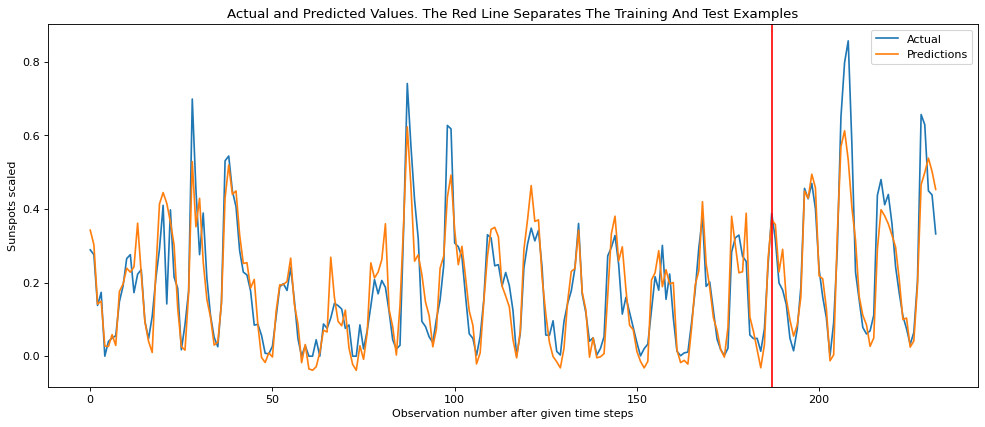

In [35]:
# take time_steps 12 month because we want to predict the value each 12 months.
time_steps = 12

train_data, test_data, data = get_train_test()
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

# Create model and train
model = create_RNN(hidden_units=2, dense_units=1, input_shape=(time_steps,1), activation=['tanh','linear'])

# Fitting the network
model.fit(trainX, trainY, epochs=15, batch_size=1, verbose=2)

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# Print error
print_error(trainY, testY, train_predict, test_predict)

#Plot result
plot_result(trainY, testY, train_predict, test_predict)

In [ ]:
# Try to make here new tests.
# try to modify the input in create_RNN() function what does it change? Chan you obtain better perfomance?